# Bagging

In [88]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

In [81]:
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
d={
    "sepal width" : data.data[50:,1],
    "petal length": data.data[50:,2],
    "species" : np.array([i for i in data.target if i>0])
}

In [36]:
d

{'sepal width': array([3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2,
        2.9, 2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. ,
        2.8, 3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. ,
        2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7,
        3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8,
        3.2, 3. , 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. ,
        2.8, 3. , 2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1,
        3.1, 2.7, 3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ]),
 'petal length': array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
        4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
        4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
        4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1,
        5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1,
        5.3, 5.5, 6.7, 6.9, 5. , 5.7, 

In [37]:
df=pd.DataFrame(d)

In [38]:
df

,sepal width,petal length,species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [39]:
df=df.sample(df.shape[0])
df

,sepal width,petal length,species
78,2.8,5.6,2
51,2.7,5.1,2
34,3.0,4.5,1
90,3.1,5.6,2
45,3.0,4.2,1
...,...,...,...
94,3.3,5.7,2
8,2.9,4.6,1
44,2.7,4.2,1
49,2.8,4.1,1


In [52]:
df_train=df.iloc[:60,:].sample(10)

df_test=df.iloc[61:,:].sample(10)

In [70]:
df_train

,sepal width,petal length,species
64,2.8,5.1,2
80,2.8,6.1,2
77,3.0,4.9,2
9,2.7,3.9,1
91,3.1,5.1,2
32,2.7,3.9,1
7,2.4,3.3,1
14,2.9,3.6,1
45,3.0,4.2,1
82,2.8,5.6,2


In [100]:
df_tt=df_train.sample(5)
X_test=df_tt.iloc[:,:-1].values
y_test=df_tt.iloc[:,-1].values
y_test

array([2, 2, 1, 2, 2])

In [133]:
def evaluate(model,X,y):
    model.fit(X,y)
    plot_tree(model)
    plt.show()
    plot_decision_regions(X,y,model)
    plt.show()
    
    y_pred=model.predict(X_test)
    print("Actual: ",y_test)
    print("Actual: ",y_pred)
    print("Acuuracy score is: ",accuracy_score(y_test,y_pred)*100)
    return model

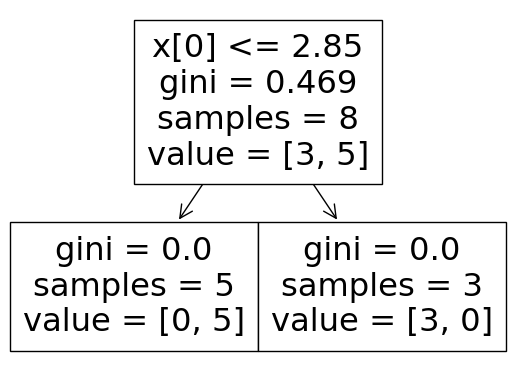

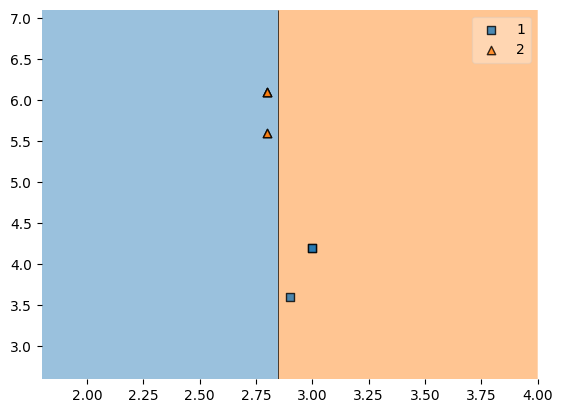

Actual:  [2 2 1 2 2]
Actual:  [2 1 1 2 1]
Acuuracy score is:  60.0


In [134]:
#first tree

dt=DecisionTreeClassifier()
df_t=df_train.sample(8,replace=True)


X_train=df_t.iloc[:,:-1].values
y_train=df_t.iloc[:,-1].values


bag1=evaluate(dt,X_train,y_train)

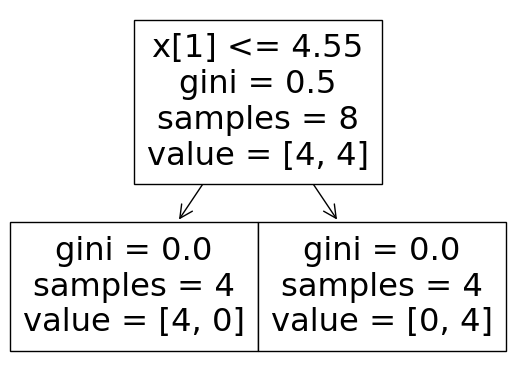

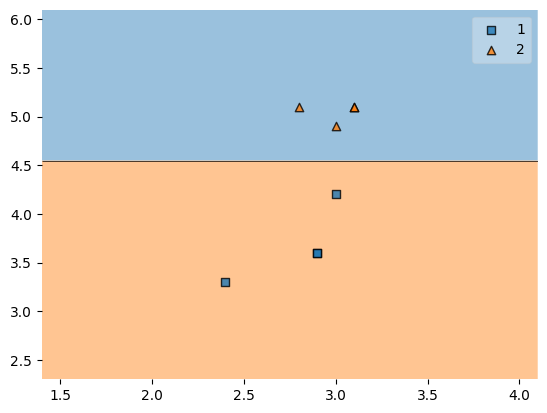

Actual:  [2 2 1 2 2]
Actual:  [2 2 1 2 2]
Acuuracy score is:  100.0


In [135]:
#second tree

dt=DecisionTreeClassifier()
df_t=df_train.sample(8,replace=True)


X_train=df_t.iloc[:,:-1].values
y_train=df_t.iloc[:,-1].values


bag2=evaluate(dt,X_train,y_train)

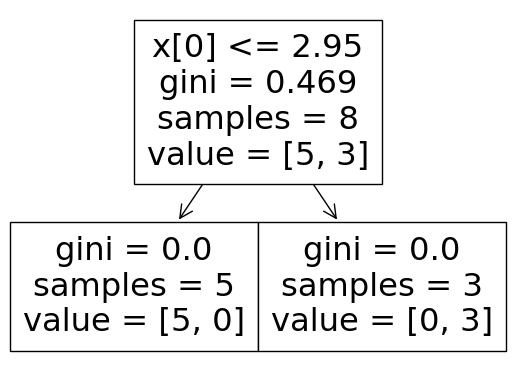

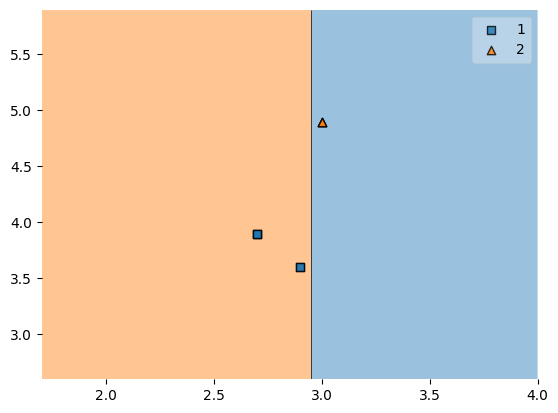

Actual:  [2 2 1 2 2]
Actual:  [1 2 2 1 2]
Acuuracy score is:  40.0


In [136]:
#third tree

dt=DecisionTreeClassifier()
df_t=df_train.sample(8,replace=True)


X_train=df_t.iloc[:,:-1].values
y_train=df_t.iloc[:,-1].values


bag3=evaluate(dt,X_train,y_train)

In [142]:
#Aggrigation

print("Prediction 1: ",bag1.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 2: ",bag2.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 3: ",bag3.predict(np.array([2.5,4.9]).reshape(1,2)))

# Answer is 2

Prediction 1:  [2]
Prediction 2:  [2]
Prediction 3:  [1]


# Stacking

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

In [146]:
kn = KNeighborsClassifier()
lr = LogisticRegression()

In [149]:
model = VotingClassifier([("knn",kn),("LR",lr),("DT",dt)
                        ]
                        )

In [151]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
Y

78    2
51    2
34    1
90    2
45    1
     ..
94    2
8     1
44    1
49    1
66    2
Name: species, Length: 100, dtype: int32

In [155]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state=0)

In [156]:
model.fit(X_train,Y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier())])

In [158]:
Y_pred=model.predict(X_test)

In [159]:
print("Accurcy score is: ",accuracy_score(Y_test,Y_pred)*100)

Accurcy score is:  93.93939393939394


# Boosting

In [160]:
from sklearn.ensemble import AdaBoostClassifier

In [162]:
abc = AdaBoostClassifier(n_estimators=4,random_state=0)

In [163]:
abc.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [165]:
Y_pred=abc.predict(X_test)

In [166]:
print("Accurcy score is: ",accuracy_score(Y_test,Y_pred)*100)

Accurcy score is:  90.9090909090909
